<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/data_cleaning_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [82]:
data = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/Google%20Play%20Store%20Apps/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [83]:
data.columns = data.columns.str.replace(' ', '_')

In [84]:
print("Shape of data (samples, features): ",data.shape)
print("Data Types: \n", data.dtypes.value_counts())

Shape of data (samples, features):  (10841, 13)
Data Types: 
 object     12
float64     1
dtype: int64


In [85]:
data.Size.value_counts().head()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
Name: Size, dtype: int64

In [86]:
data.Size=data.Size.str.replace('k','e+3')
data.Size=data.Size.str.replace('M','e+6')
data.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

In [87]:
def is_convertable(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
    
temp=data.Size.apply(lambda x: is_convertable(x))
temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

In [88]:
data.Size[~temp].value_counts()

Varies with device    1695
1,000+                   1
Name: Size, dtype: int64

In [89]:
data.Size=data.Size.replace('Varies with device',np.nan)
data.Size=data.Size.replace('1,000+',1000)

In [90]:
data.Size=pd.to_numeric(data.Size)

Text(0, 0.5, 'Frequency')

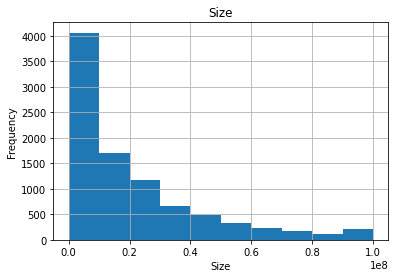

In [91]:
data.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

In [92]:
data.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [93]:
data.Installs=data.Installs.apply(lambda x: x.strip('+'))
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.replace('Free',np.nan)
data.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [94]:
data.Installs.str.isnumeric().sum()

10840

In [95]:
data.Installs=pd.to_numeric(data.Installs)

Text(0, 0.5, 'Frequency')

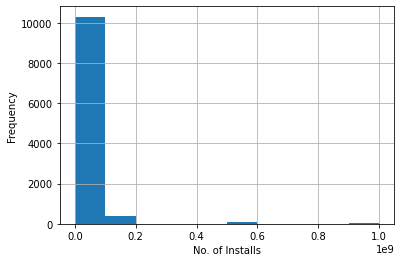

In [96]:
data.Installs=pd.to_numeric(data.Installs)
data.Installs.hist();
plt.xlabel('No. of Installs')
plt.ylabel('Frequency')

In [97]:
data.Reviews.str.isnumeric().sum()

10840

In [98]:
data[~data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [99]:
data=data.drop(data.index[10472])

In [100]:
data[10471:].head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404000.0,100000.0,Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4100000.0,10000000.0,Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


Text(0, 0.5, 'Frequency')

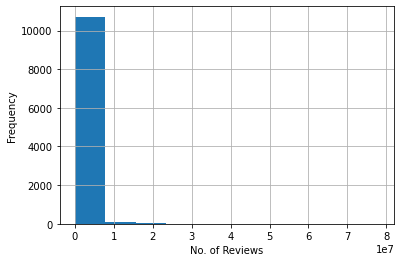

In [101]:
data.Reviews=pd.to_numeric(data.Reviews)
data.Reviews.hist();
plt.xlabel('No. of Reviews')
plt.ylabel('Frequency')

In [102]:
print("Range: ", data.Rating.min(),"-",data.Rating.max())

Range:  1.0 - 5.0


In [103]:
data.Rating.dtype

dtype('float64')

In [104]:
print(data.Rating.isna().sum(),"null values out of", len(data.Rating))

1474 null values out of 10840


In [105]:
data.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [106]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [107]:
data.Price=data.Price.apply(lambda x: x.strip('$'))

Text(0, 0.5, 'Frequency')

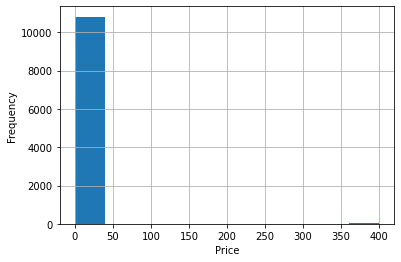

In [108]:
data.Price=pd.to_numeric(data.Price)
data.Price.hist();
plt.xlabel('Price')
plt.ylabel('Frequency')

In [109]:
temp=data.Price.apply(lambda x: True if x>350 else False)
data[temp].head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


In [110]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

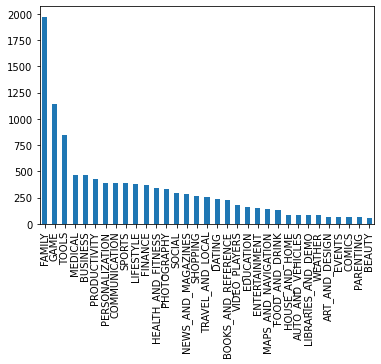

In [111]:
data.Category.value_counts().plot(kind='bar')

In [112]:
data.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

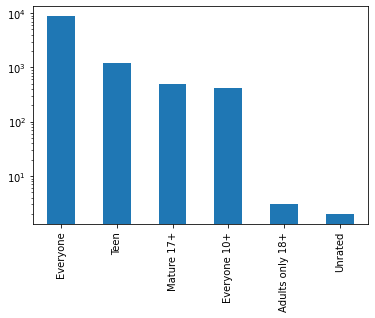

In [113]:
data.Content_Rating.value_counts().plot(kind='bar')
plt.yscale('log')

In [114]:
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [115]:
sep = ';'
rest = data.Genres.apply(lambda x: x.split(sep)[0])
data['Pri_Genres']=rest
data.Pri_Genres.head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Pri_Genres, dtype: object

In [116]:
rest = data.Genres.apply(lambda x: x.split(sep)[-1])
rest.unique()
data['Sec_Genres']=rest
data.Sec_Genres.head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Sec_Genres, dtype: object

In [117]:
grouped = data.groupby(['Pri_Genres','Sec_Genres'])
grouped.size().head(15)

Pri_Genres       Sec_Genres        
Action           Action                365
                 Action & Adventure     17
Adventure        Action & Adventure     13
                 Adventure              75
                 Brain Games             1
                 Education               2
Arcade           Action & Adventure     16
                 Arcade                220
                 Pretend Play            1
Art & Design     Action & Adventure      2
                 Art & Design           58
                 Creativity              7
                 Pretend Play            2
Auto & Vehicles  Auto & Vehicles        85
Beauty           Beauty                 53
dtype: int64

In [118]:
twowaytable = pd.crosstab(index=data["Pri_Genres"],columns=data["Sec_Genres"])
twowaytable.head()

Sec_Genres,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,Business,Card,Casino,Casual,Comics,Communication,Creativity,Dating,Education,Educational,Entertainment,Events,Finance,Food & Drink,Health & Fitness,House & Home,Libraries & Demo,Lifestyle,Maps & Navigation,Medical,Music,Music & Video,News & Magazines,Parenting,Personalization,Photography,Pretend Play,Productivity,Puzzle,Racing,Role Playing,Shopping,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
Pri_Genres,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,365,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Adventure,0,13,75,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arcade,0,16,0,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Art & Design,0,2,0,0,58,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Auto & Vehicles,0,0,0,0,0,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


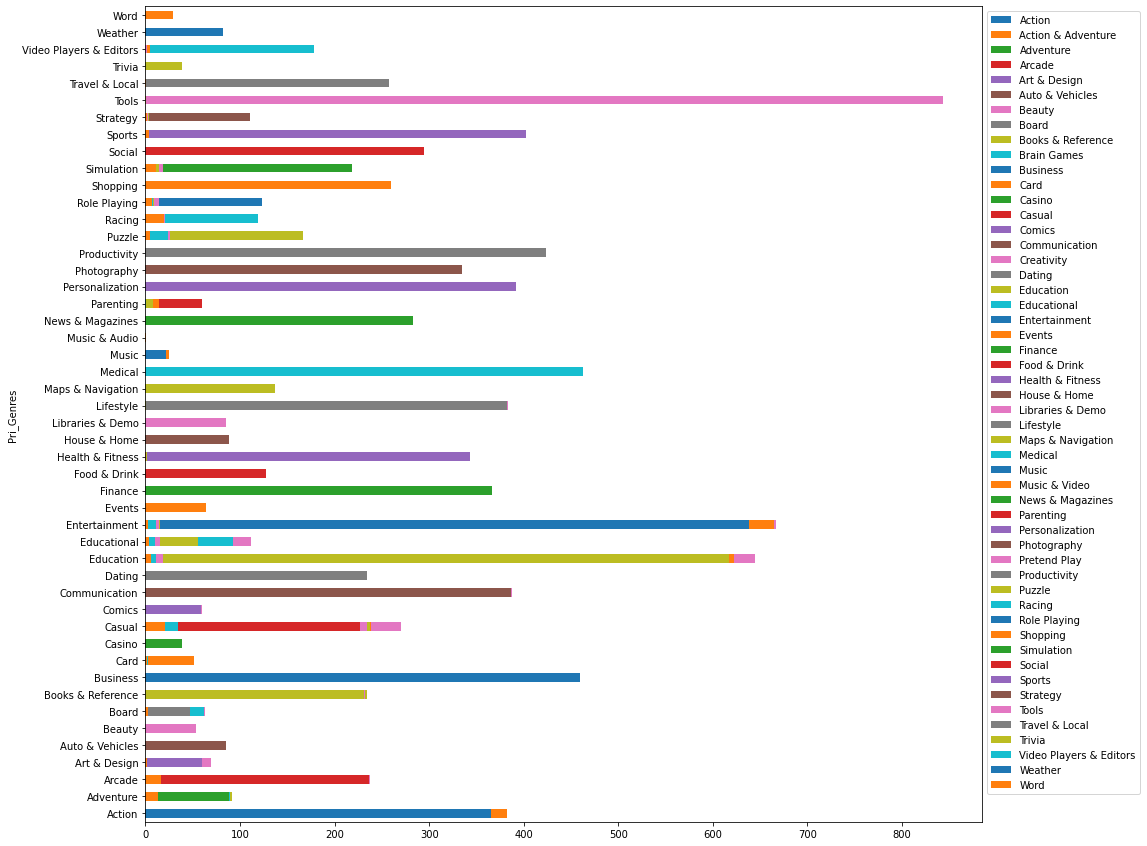

In [119]:
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))

In [120]:
data.Last_Updated.head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

In [121]:
from datetime import datetime,date
temp=pd.to_datetime(data.Last_Updated)
temp.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last_Updated, dtype: datetime64[ns]

In [122]:
data['Last_Updated_Days'] = temp.apply(lambda x:date.today()-datetime.date(x))
data.Last_Updated_Days.head()

0   1006 days
1    998 days
2    800 days
3    854 days
4    842 days
Name: Last_Updated_Days, dtype: timedelta64[ns]

In [123]:
data.Android_Ver.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [124]:
data['Version_begin']=data.Android_Ver.apply(lambda x:str(x).split(' and ')[0].split(' - ')[0])
data.Version_begin=data.Version_begin.replace('4.4W','4.4')
data['Version_end']=data.Android_Ver.apply(lambda x:str(x).split(' and ')[-1].split(' - ')[-1])

In [125]:
data.Version_begin.unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1',
       'nan', '1.0'], dtype=object)

In [126]:
twowaytable = pd.crosstab(index=data.Version_begin,columns=data.Version_end)
twowaytable.head()

Version_end,6.0,7.1.1,8.0,Varies with device,nan,up
Version_begin,,,,,,
1.0,0,0,0,0,0,2
1.5,0,0,0,0,0,20
1.6,0,0,0,0,0,116
2.0,0,0,0,0,0,32
2.0.1,0,0,0,0,0,7


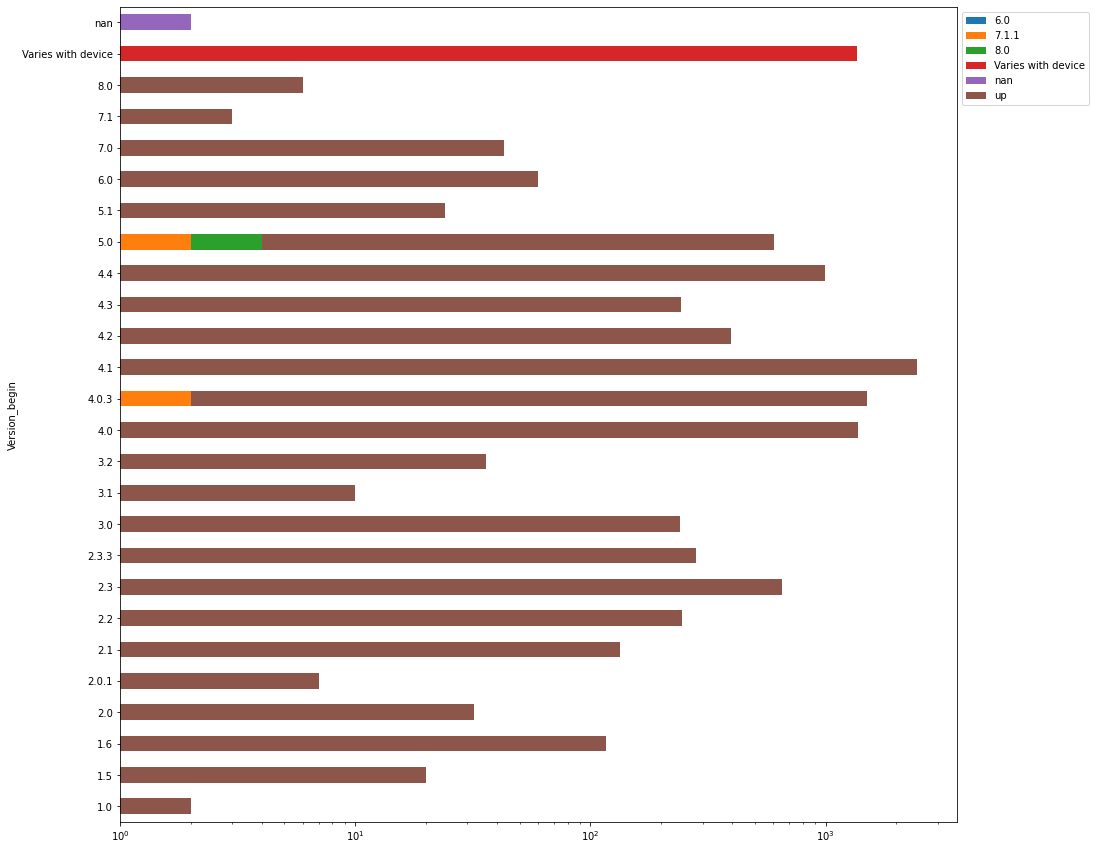

In [127]:
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xscale('log')

In [128]:
data.Version_end.unique()

array(['up', 'Varies with device', '7.1.1', '8.0', 'nan', '6.0'],
      dtype=object)

In [129]:
data.Current_Ver.value_counts().head(6)

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
1.3                    145
Name: Current_Ver, dtype: int64

In [130]:
data.Current_Ver.isna().sum()

8

In [131]:
import re
temp=data.Current_Ver.replace(np.nan,'Varies with device')
temp=temp.apply(lambda x: 'Varies with device' if x=='Varies with device'  else  re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0] )

In [132]:
temp.unique()

array(['1.0', '2.0', '1.2', 'Varies with device', '1.1', '6.1', '2.9',
       '2.8', '3.8', '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7',
       '1.6', '2.1', '1.3', '1', '1.4', '3.0', '1.7', '2.5', '2.4', '1.9',
       '0.2', '4.4', '2.3', '8.3', '3.2', '4.6', '5.4', '8.0', '3.3',
       '9.1', '5.0', '9.0', '7.0', '3.9', '3.4', '9.7', '4.9', '5.2',
       '3.5', '7.3', '5.1', '4.1', '9', '0.9', '6.4', '3.7', '2.6', '4.3',
       '6.3', '4.7', '4.2', '1.8', '3', '9.8', '2', '4', '', '6', '7.5',
       '9.9', '0.1', '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '8.1',
       '6.6', '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '5.7', '8.5', '0',
       '8.4', '6.8', '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', '8.8',
       '7.4', '9.6', '8', '9.4', '5', '0.7', '0.5', '7', '7.6', '0.6',
       '8.9', '6.9', '9.3', '9.2', '8.6', '9.5', '0.8', '0.4', '0.3'],
      dtype=object)

In [134]:
data['Current_Ver_updated']=temp

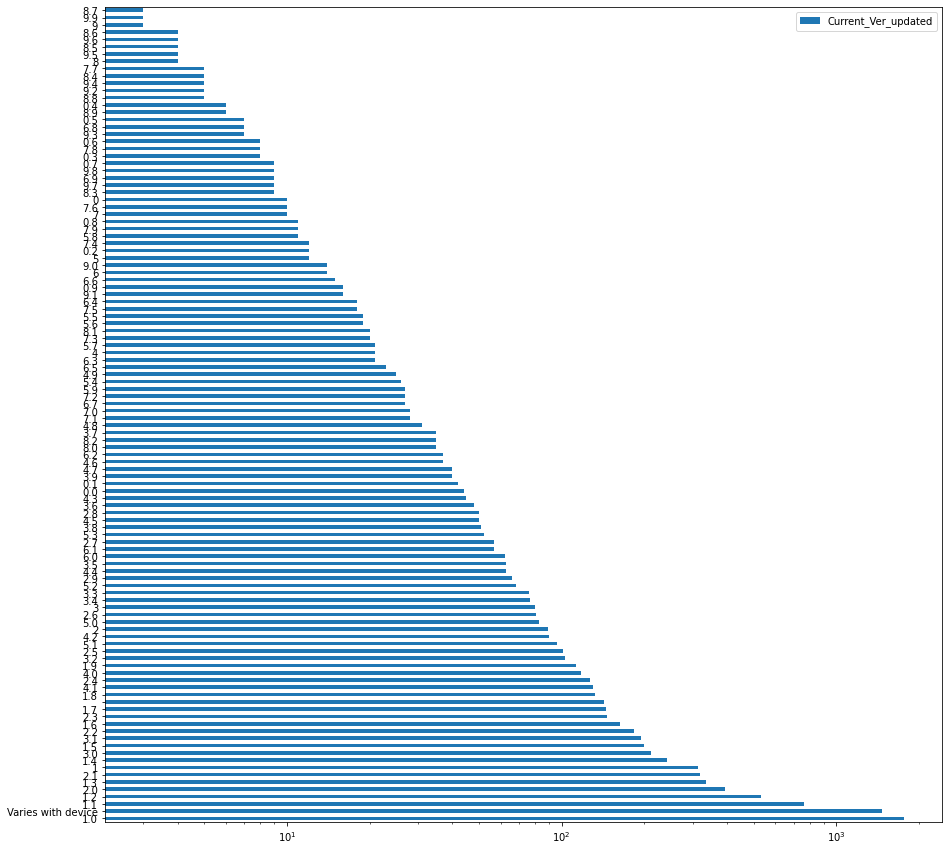

In [135]:
data.Current_Ver_updated.value_counts().plot(kind="barh", figsize=(15,15));
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xscale('log')